In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score,accuracy_score, classification_report, confusion_matrix,hamming_loss
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.multioutput import MultiOutputClassifier
%matplotlib inline

In [2]:
import warnings as wr
wr.filterwarnings('ignore')

In [3]:
data = pd.read_csv("/content/Dataset .csv")
data

Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

                                                Address  \
0     Third Floor, Century City Mall, Kalayaan Avenu...   
1     Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2     Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3     Third Floor, Mega Fashion Hall, SM Megamall, O...   
4     Third Floor, Mega Atrium, SM Megamall, Ortigas...   
...                                                 ...   
9546  Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...   
9547  Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...   
9548  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...   
9549  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...   
9550  Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...   

                                        Locality  \
0      Century City Mall, Poblacion, Makati City   
1     Little Tokyo, Legaspi Village, Makati City   
2     Edsa Shangri-La, Ortigas, Mandaluyong City   
3         SM Megamall, Ortigas, Mandaluyong City   
4         SM Megamall, Ortigas, Mandaluyong City   
...                                          ...   
9546                                    Karak�_y   
9547                                   Ko��uyolu   
9548                                 Kuru�_e��me   
9549                                 Kuru�_e��me   
9550                                        Moda   

                                       Locality Verbose   Longitude  \
0     Century City Mall, Poblacion, Makati City, Mak...  121.027535   
1     Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101   
2     Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831   
3     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475   
4     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508   
...                                                 ...         ...   
9546                                Karak�_y, ��stanbul   28.977392   
9547                               Ko��uyolu, ��stanbul   29.041297   
9548                             Kuru�_e��me, ��stanbul   29.034640   
9549                             Kuru�_e��me, ��stanbul   29.036019   
9550                                    Moda, ��stanbul   29.026016   

       Latitude                          Cuisines  ...          Currency  \
0     14.565443        French, Japanese, Desserts  ...  Botswana Pula(P)   
1     14.553708                          Japanese  ...  Botswana Pula(P)   
2     14.581404  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)   
3     14.585318                   Japanese, Sushi  ...  Botswana Pula(P)   
4     14.584450                  Japanese, Korean  ...  Botswana Pula(P)   
...         ...                               ...  ...               ...   
9546  41.022793                           Turkish  ...  Turkish Lira(TL)   
9547  41.009847   World Cuisine, Patisserie, Cafe  ...  Turkish Lira(TL)   
9548  41.055817            Italian, World Cuisine  ...  Turkish Lira(TL)   
9549  41.057979                   Restaurant Cafe  ...  Turkish Lira(TL)   
9550  40.9

In [4]:
data.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
data.describe()

Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000          2.500000      5.000000  
50%              400.000000     2.000000          3.200000     31.000000  
75%              700.000000     2.000000          3.700000    131.000000  
max           800000.000000     4.000000          4.900000  10934.000000

In [7]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [8]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [9]:
# Data Cleaning
restaurent_data = data.copy()
restaurent_data

Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

                                                Address  \
0     Third Floor, Century City Mall, Kalayaan Avenu...   
1     Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2     Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3     Third Floor, Mega Fashion Hall, SM Megamall, O...   
4     Third Floor, Mega Atrium, SM Megamall, Ortigas...   
...                                                 ...   
9546  Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...   
9547  Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...   
9548  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...   
9549  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...   
9550  Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...   

                                        Locality  \
0      Century City Mall, Poblacion, Makati City   
1     Little Tokyo, Legaspi Village, Makati City   
2     Edsa Shangri-La, Ortigas, Mandaluyong City   
3         SM Megamall, Ortigas, Mandaluyong City   
4         SM Megamall, Ortigas, Mandaluyong City   
...                                          ...   
9546                                    Karak�_y   
9547                                   Ko��uyolu   
9548                                 Kuru�_e��me   
9549                                 Kuru�_e��me   
9550                                        Moda   

                                       Locality Verbose   Longitude  \
0     Century City Mall, Poblacion, Makati City, Mak...  121.027535   
1     Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101   
2     Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831   
3     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475   
4     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508   
...                                                 ...         ...   
9546                                Karak�_y, ��stanbul   28.977392   
9547                               Ko��uyolu, ��stanbul   29.041297   
9548                             Kuru�_e��me, ��stanbul   29.034640   
9549                             Kuru�_e��me, ��stanbul   29.036019   
9550                                    Moda, ��stanbul   29.026016   

       Latitude                          Cuisines  ...          Currency  \
0     14.565443        French, Japanese, Desserts  ...  Botswana Pula(P)   
1     14.553708                          Japanese  ...  Botswana Pula(P)   
2     14.581404  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)   
3     14.585318                   Japanese, Sushi  ...  Botswana Pula(P)   
4     14.584450                  Japanese, Korean  ...  Botswana Pula(P)   
...         ...                               ...  ...               ...   
9546  41.022793                           Turkish  ...  Turkish Lira(TL)   
9547  41.009847   World Cuisine, Patisserie, Cafe  ...  Turkish Lira(TL)   
9548  41.055817            Italian, World Cuisine  ...  Turkish Lira(TL)   
9549  41.057979                   Restaurant Cafe  ...  Turkish Lira(TL)   
9550  40.9

In [10]:
restaurent_data['Cuisines'].unique()

array(['French, Japanese, Desserts', 'Japanese',
       'Seafood, Asian, Filipino, Indian', ..., 'Burger, Izgara',
       'World Cuisine, Patisserie, Cafe', 'Italian, World Cuisine'],
      dtype=object)

In [11]:
restaurent_data['City'].unique()

array(['Makati City', 'Mandaluyong City', 'Pasay City', 'Pasig City',
       'Quezon City', 'San Juan City', 'Santa Rosa', 'Tagaytay City',
       'Taguig City', 'Bras�_lia', 'Rio de Janeiro', 'S��o Paulo',
       'Albany', 'Armidale', 'Athens', 'Augusta', 'Balingup',
       'Beechworth', 'Boise', 'Cedar Rapids/Iowa City', 'Chatham-Kent',
       'Clatskanie', 'Cochrane', 'Columbus', 'Consort', 'Dalton',
       'Davenport', 'Des Moines', 'Dicky Beach', 'Dubuque',
       'East Ballina', 'Fernley', 'Flaxton', 'Forrest', 'Gainesville',
       'Hepburn Springs', 'Huskisson', 'Inverloch', 'Lakes Entrance',
       'Lakeview', 'Lincoln', 'Lorn', 'Macedon', 'Macon', 'Mayfield',
       'Mc Millan', 'Middleton Beach', 'Miller', 'Monroe', 'Montville',
       'Ojo Caliente', 'Orlando', 'Palm Cove', 'Paynesville', 'Penola',
       'Pensacola', 'Phillip Island', 'Pocatello', 'Potrero', 'Princeton',
       'Rest of Hawaii', 'Savannah', 'Singapore', 'Sioux City',
       'Tampa Bay', 'Tanunda', 'Trentha

In [12]:
# Check for missing values in the Cuisines column
missing_cuisines = restaurent_data[restaurent_data['Cuisines'].isna()]

# Display the rows with missing Cuisines
print("Rows with missing Cuisines:")
print(missing_cuisines)

Rows with missing Cuisines:
     Restaurant ID                 Restaurant Name  Country Code  \
84        17284105                   Cookie Shoppe           216   
87        17284211  Pearly's Famous Country Cookng           216   
94        17284158               Jimmie's Hot Dogs           216   
297       17374552                  Corkscrew Cafe           216   
328       17501439                        Dovetail           216   
346       17606621            HI Lite Bar & Lounge           216   
368       17059060                       Hillstone           216   
418       17142698                Leonard's Bakery           216   
455       17616465        Tybee Island Social Club           216   

               City                                          Address  \
84           Albany               115 N Jackson St, Albany, GA 31701   
87           Albany             814 N Slappey Blvd, Albany, GA 31701   
94           Albany               204 S Jackson St, Albany, GA 31701   
297

In [13]:
# Get the indices of missing rows
missing_indices = restaurent_data[restaurent_data['Cuisines'].isna()].index
print("Indices of rows with missing Cuisines:")
print(missing_indices)

Indices of rows with missing Cuisines:
Index([84, 87, 94, 297, 328, 346, 368, 418, 455], dtype='int64')


In [14]:
# Identify the Indices to Remove:
missing_indices = [84, 87, 94, 297, 328, 346, 368, 418, 455]
# Use the drop() Method:
 # Remove the rows with the specified indices
restaurent_data.drop(index=missing_indices, inplace=True)
print(restaurent_data)

      Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

                           

In [15]:
# To check wheather is there any num in Dataset
restaurent_data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [16]:
# Function to get user preferences
def get_user_preferences():
    # You can modify these values or take input from the user
    user_preferences = {
        'cuisine': 'Indian',  # User's preferred cuisine
        'price_range': 3,     # User's preferred price range (1-4)
        'city': 'Pasay City'   # User's preferred city
    }
    return user_preferences

# Example of how to use the function
user_preferences = get_user_preferences()

# Display the user preferences
print("User  Preferences:")
print(f"Cuisine: {user_preferences['cuisine']}")
print(f"Price Range: {user_preferences['price_range']}")
print(f"City: {user_preferences['city']}")

User  Preferences:
Cuisine: Indian
Price Range: 3
City: Pasay City


In [17]:

# Sample DataFrame with restaurant data

data = restaurent_data

restaurant_data = pd.DataFrame(data)

# Function to get user preferences

def get_user_preferences():
    print("Welcome to the Restaurant Recommendation System!")
    print("Please provide your preferences to get personalized recommendations.")
    print("-----------------------------------------------------------")

    # Taking user input for preferences

    cuisine = input("Enter your preferred cuisine (e.g., Indian, Italian, Chinese): ")
    price_range = int(input("Enter your preferred price range (1-4): "))
    city = input("Enter your preferred city: ")

    user_preferences = {
        'cuisine': cuisine,  # User's preferred cuisine
        'price_range': price_range,  # User's preferred price range (1-4)
        'city': city  # User's preferred city
    }
    return user_preferences

# Function to recommend restaurants based on user preferences

def recommend_restaurants(df, user_preferences):

    # Filter based on user preferences

    filtered_df = df[
        (df['Cuisines'].str.contains(user_preferences['cuisine'], case=False)) &
        (df['Price range'] == user_preferences['price_range']) &
        (df['City'] == user_preferences['city'])
    ]

    # Sort by Aggregate rating

    recommended = filtered_df.sort_values(by='Aggregate rating', ascending=False)

    return recommended[['Restaurant Name', 'Cuisines', 'Price range', 'Aggregate rating', 'City']]

# Get user preferences

user_preferences = get_user_preferences()

# Get recommendations

recommendations = recommend_restaurants(restaurant_data, user_preferences)

# Display recommendations

if not recommendations.empty:
    print("\nRecommended Restaurants:")
    print(recommendations)
else:
    print("\nNo restaurants found matching your preferences.")

Welcome to the Restaurant Recommendation System!
Please provide your preferences to get personalized recommendations.
-----------------------------------------------------------
Enter your preferred cuisine (e.g., Indian, Italian, Chinese): Brazilian
Enter your preferred price range (1-4): 3
Enter your preferred city: Bras�_lia

Recommended Restaurants:
   Restaurant Name             Cuisines  Price range  Aggregate rating  \
25           Maori            Brazilian            3               3.8   
33     Buena Carne  Bar Food, Brazilian            3               3.6   

         City  
25  Bras�_lia  
33  Bras�_lia  


Classification Report:
                   precision    recall  f1-score   support

          Afghani       0.00      0.00      0.00         4
          African       0.00      0.00      0.00         3
         American       0.37      0.10      0.15        73
           Andhra       0.00      0.00      0.00         2
          Arabian       0.00      0.00      0.00         2
        Argentine       0.00      0.00      0.00         1
         Armenian       0.00      0.00      0.00         0
            Asian       0.27      0.08      0.12        50
     Asian Fusion       0.00      0.00      0.00         1
         Assamese       0.00      0.00      0.00         0
       Australian       0.00      0.00      0.00         1
           Awadhi       0.00      0.00      0.00         0
              BBQ       0.00      0.00      0.00         8
           Bakery       0.10      0.04      0.05       135
         Bar Food       0.00      0.00      0.00        13
          Belgian       0.00    

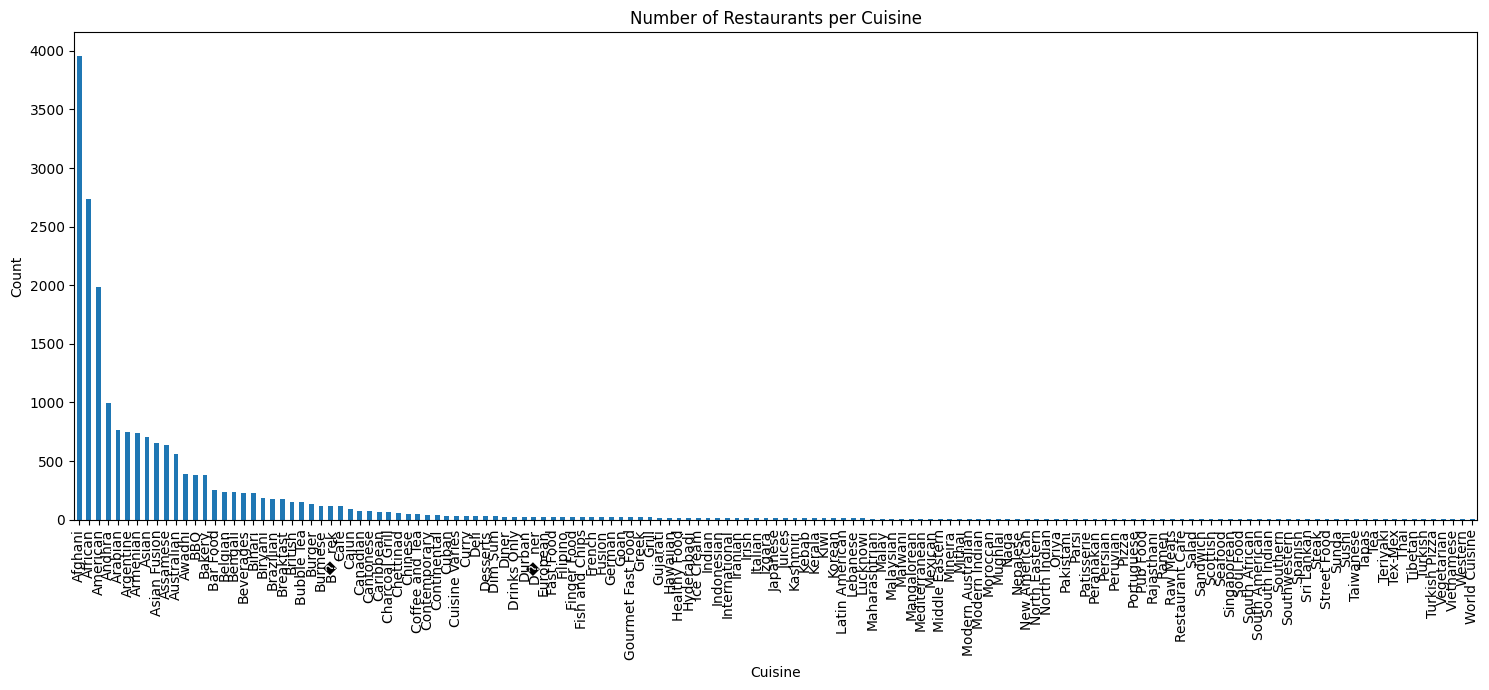


Key Challenges and Biases:
- **Class Imbalance**: Many cuisines have very few samples, leading to poor prediction accuracy.
- **Feature Relevance**: Features like 'City' may not strongly correlate with niche cuisines.
- **Label Overlap**: Restaurants with multiple cuisines complicate decision boundaries.


In [18]:
# Task 3

# Data Preprocessing
restaurant_data = restaurent_data.copy()

# Split cuisines into lists and encode with MultiLabelBinarizer
restaurant_data['Cuisines_List'] = restaurant_data['Cuisines'].str.split(', ')
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(restaurant_data['Cuisines_List'])

# Select features and preprocess
features = ['City', 'Price range', 'Aggregate rating']
if 'Votes' in restaurant_data.columns:
    features.append('Votes')

X = restaurant_data[features]

# ColumnTransformer for feature preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('city', OneHotEncoder(handle_unknown='ignore'), ['City']),
        ('numeric', 'passthrough', ['Price range', 'Aggregate rating'] + (['Votes'] if 'Votes' in features else []))
    ])

X_processed = preprocessor.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Initialize and train the model (Random Forest)
model = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

# Classification report and metrics
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=mlb.classes_, zero_division=0))
print("\nHamming Loss:", hamming_loss(y_test, y_pred))
print("Exact Match Accuracy:", accuracy_score(y_test, y_pred))

# Analyze performance per cuisine
report = classification_report(y_test, y_pred, target_names=mlb.classes_, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Identify poorly performing cuisines (F1-score < 0.5)
low_f1_cuisines = report_df[report_df['f1-score'] < 0.5].sort_values('f1-score')
print("\nCuisines with Low F1-Scores:")
print(low_f1_cuisines)

# Class distribution analysis
class_counts = pd.Series(y.sum(axis=0)).sort_values(ascending=False)
class_counts.index = mlb.classes_
print("\nTop 10 Cuisines by Count:")
print(class_counts.head(10))
print("\nBottom 10 Cuisines by Count:")
print(class_counts.tail(10))

# Visualize class distribution
plt.figure(figsize=(15, 7))
class_counts.plot(kind='bar')
plt.title('Number of Restaurants per Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Summary of challenges/biases
print("\nKey Challenges and Biases:")
print("- **Class Imbalance**: Many cuisines have very few samples, leading to poor prediction accuracy.")
print("- **Feature Relevance**: Features like 'City' may not strongly correlate with niche cuisines.")
print("- **Label Overlap**: Restaurants with multiple cuisines complicate decision boundaries.")

Missing Latitude: 0
Missing Longitude: 0


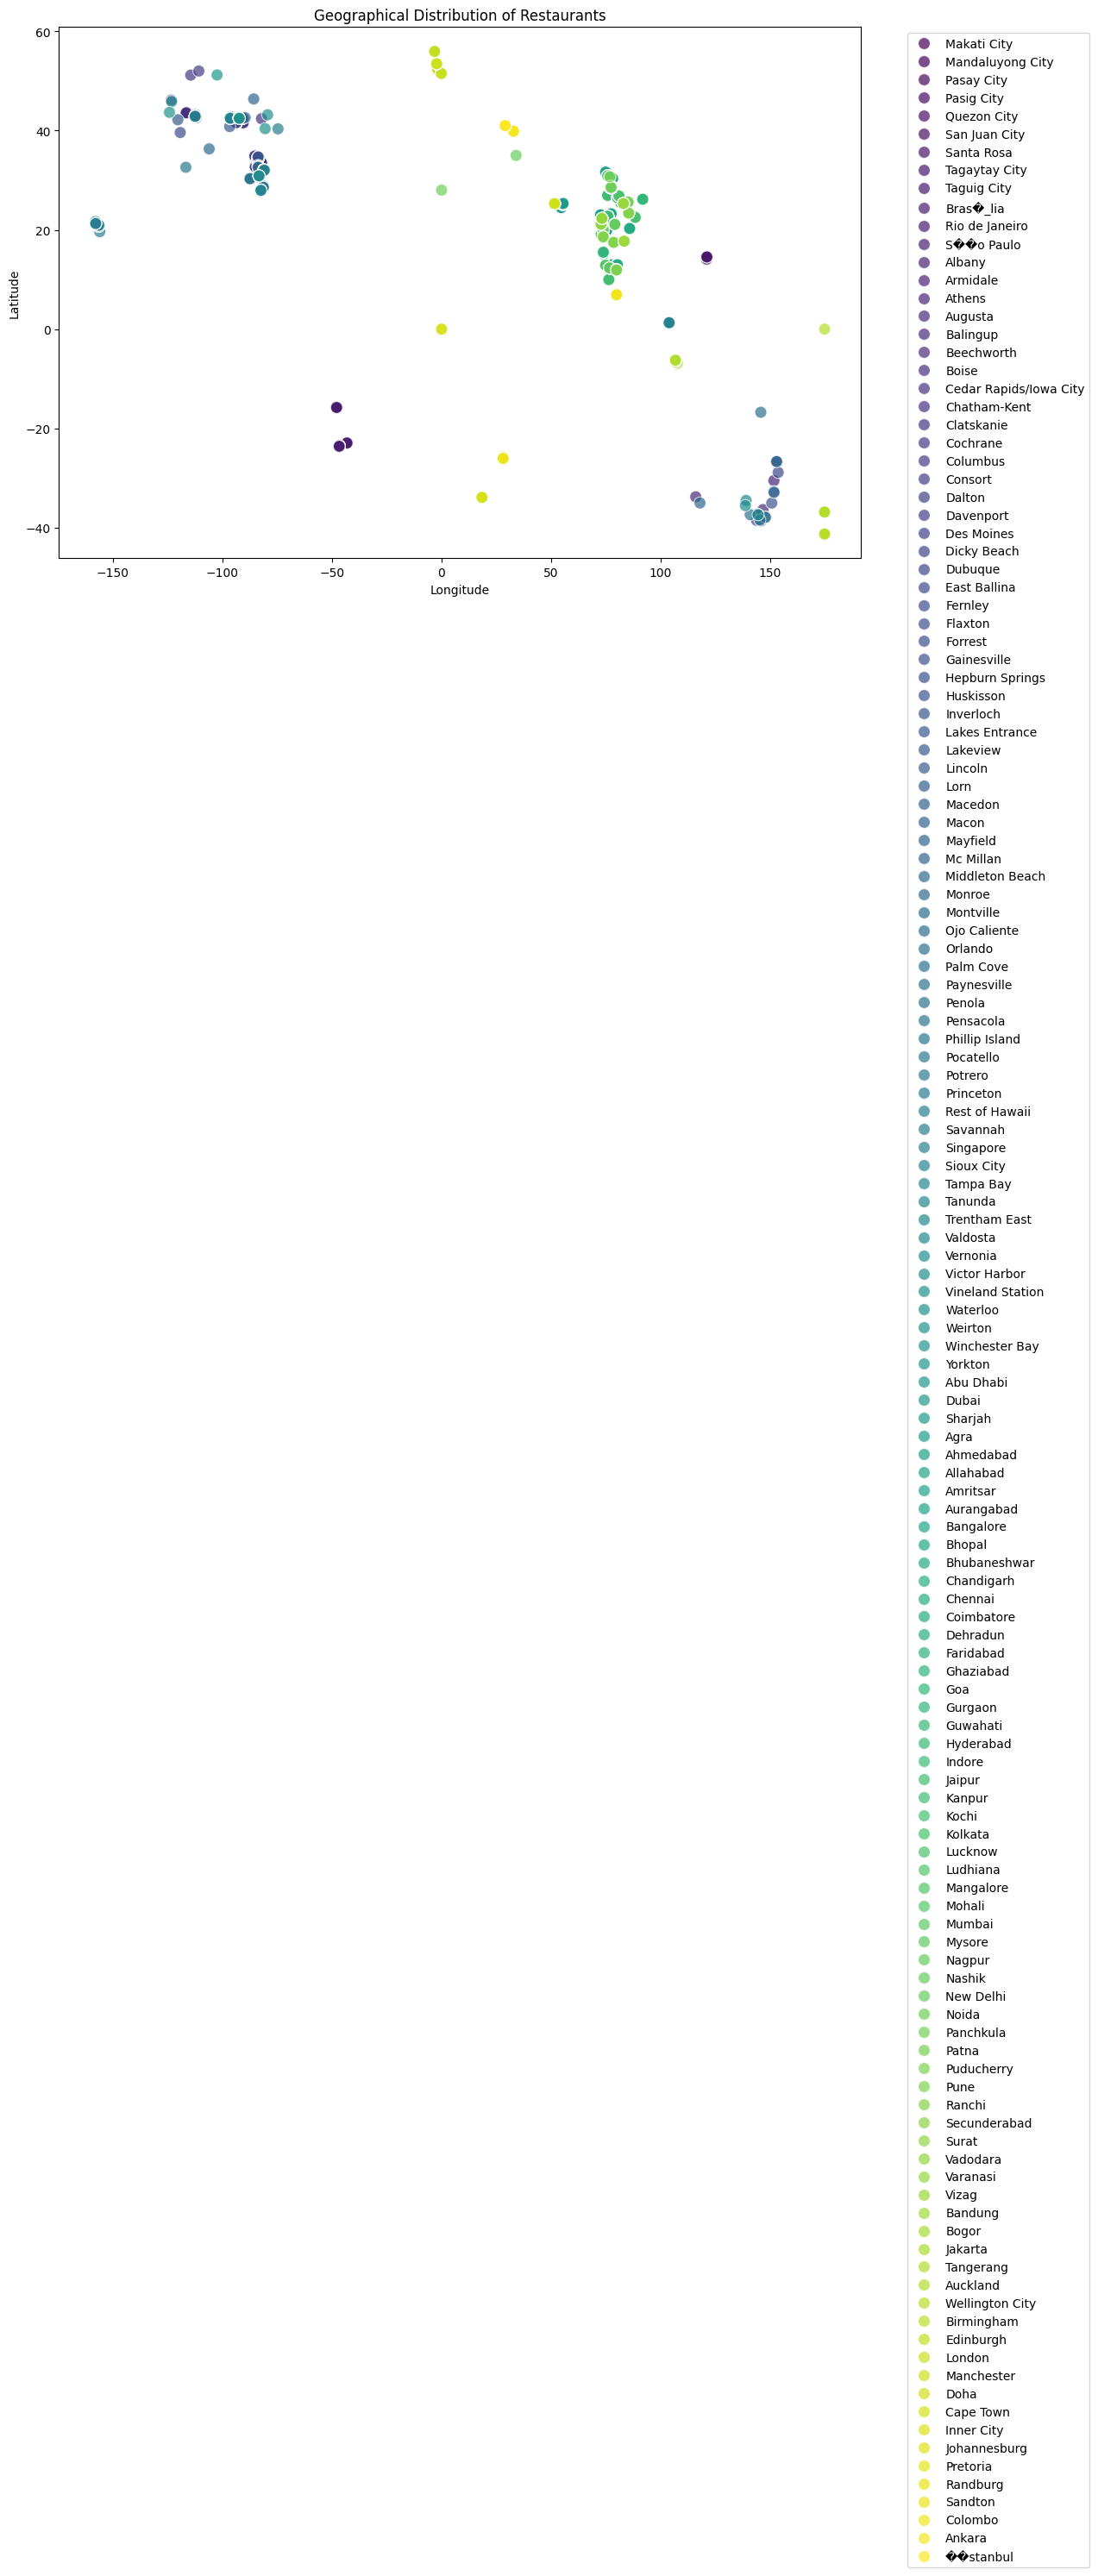

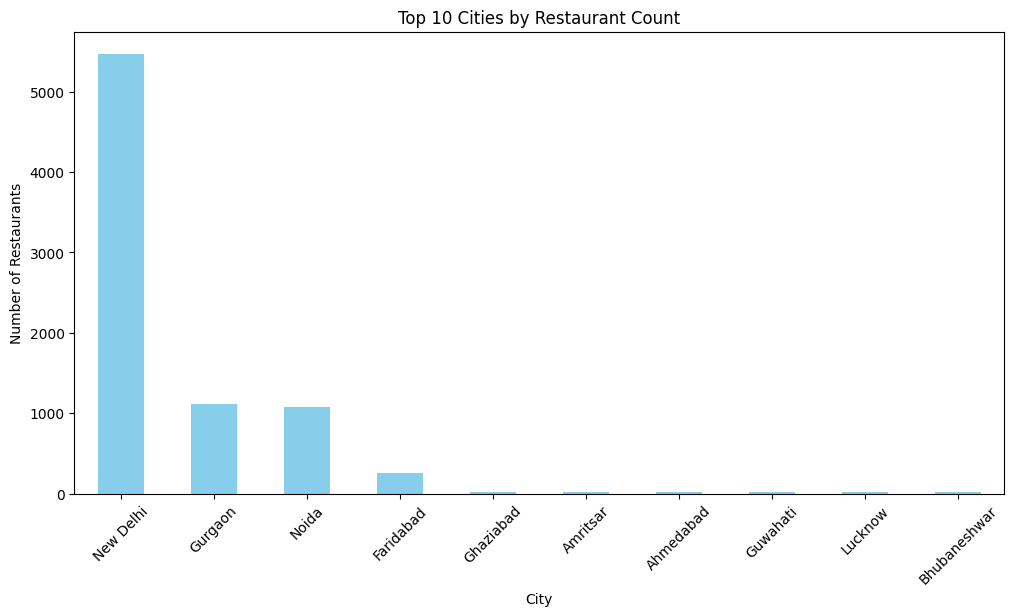


City-wise Statistics:
              Restaurant Count  Average Rating  Price range   Top Cuisine
City                                                                     
New Delhi                 5473        2.438845     1.621597  North Indian
Gurgaon                   1118        2.651431     1.855993  North Indian
Noida                     1080        2.036204     1.601852  North Indian
Faridabad                  251        1.866932     1.454183  North Indian
Ghaziabad                   25        2.852000     1.800000  North Indian
Amritsar                    21        3.685714     1.809524  North Indian
Ahmedabad                   21        4.161905     2.571429   Continental
Guwahati                    21        4.190476     2.523810       Chinese
Lucknow                     21        4.195238     2.571429          Cafe
Bhubaneshwar                21        3.980952     1.857143       Chinese

Correlation between Price Range and Rating:
                  Price range  Aggregate rat

In [19]:
# Load the dataset (if not already loaded)
restaurant_data = restaurent_data.copy()

# Check for missing coordinates
print("Missing Latitude:", restaurant_data['Latitude'].isna().sum())
print("Missing Longitude:", restaurant_data['Longitude'].isna().sum())

# 1. Visualize restaurant distribution on a map
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Longitude',
    y='Latitude',
    data=restaurant_data,
    hue='City',  # Color by city
    palette='viridis',
    alpha=0.7,
    s=100
)
plt.title('Geographical Distribution of Restaurants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 2. Group by city and analyze concentration
city_stats = restaurant_data.groupby('City').agg({
    'Restaurant Name': 'count',  # Number of restaurants
    'Aggregate rating': 'mean',  # Average rating
    'Price range': 'mean',       # Average price range
}).rename(columns={
    'Restaurant Name': 'Restaurant Count',
    'Aggregate rating': 'Average Rating'
}).sort_values('Restaurant Count', ascending=False)

# Plot top cities by restaurant count
plt.figure(figsize=(12, 6))
city_stats['Restaurant Count'].head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Cities by Restaurant Count')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

# 3. Calculate statistics by city
# Add most common cuisine per city
city_stats['Top Cuisine'] = restaurant_data.groupby('City')['Cuisines'].apply(
    lambda x: x.str.split(', ').explode().mode()[0]
)

print("\nCity-wise Statistics:")
print(city_stats.head(10))

# 4. Identify insights and patterns
# Insight 1: Correlation between price range and rating
correlation = restaurant_data[['Price range', 'Aggregate rating']].corr()
print("\nCorrelation between Price Range and Rating:")
print(correlation)

# Insight 2: Top rated cities
top_rated_cities = city_stats.sort_values('Average Rating', ascending=False).head(5)
print("\nTop 5 Cities by Average Rating:")
print(top_rated_cities[['Average Rating', 'Top Cuisine']])

# Insight 3: Most expensive cities
pricey_cities = city_stats.sort_values('Price range', ascending=False).head(5)
print("\nTop 5 Most Expensive Cities:")
print(pricey_cities[['Price range', 'Top Cuisine']])